In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os.path import join
input_dir = "Dataset"

# Any results you write to the current directory are saved as output.

In [2]:
df_train = pd.read_csv(join(input_dir, 'train.csv'))
df_train_label = df_train['Survived']
del df_train['Survived']
df_test = pd.read_csv(join(input_dir, 'test.csv'))
df_test_label = pd.read_csv(join(input_dir, 'gender_submission.csv')).values[:,1]


Just Watch Train DataSet

In [3]:
df_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Just Watch Test Dataset

In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The 'name' feature does not seem to be related to 'survival'.
So delete it

In [5]:
del df_train["Name"]
del df_test["Name"]

In [6]:
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


Check Null Values

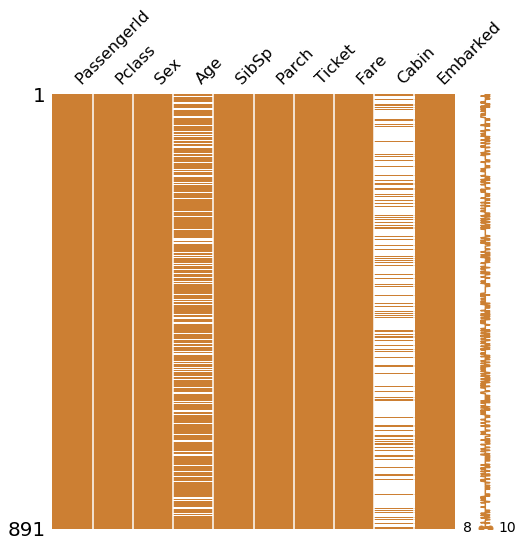

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

Back up Cabin Columns and delete from dataset

In [9]:
df_train_Cabin = df_train["Cabin"]
df_test_Cabin = df_test["Cabin"]

'Ticket' feature just means 'Ticket Number', So meaningless feature.

In [10]:
del df_train["Cabin"]
del df_test["Cabin"]
del df_train['Ticket']
del df_test['Ticket']

In [11]:
df_train.replace(np.NaN, np.nan, inplace=True)
df_test.replace(np.NaN, np.nan, inplace=True)

In [12]:
df_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [13]:
df_train_dummy = pd.get_dummies(df_train)
df_test_dummy = pd.get_dummies(df_test)

In [14]:
df_train_dummy.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
for c in df_train_dummy.columns : 
    df_train_dummy[c] = df_train_dummy[c].astype(np.float64)
# df_train_dummy.replace(np.NaN, np.nan, inplace=True)
# df_test_dummy.replace(np.NaN, np.nan, inplace=True)

In [16]:
from fancyimpute import IterativeImputer
train_mice = IterativeImputer(n_iter=200, verbose=False).fit_transform(df_train_dummy.values)
test_mice = IterativeImputer(n_iter=200,  verbose=False).fit_transform(df_test_dummy.values)


Using TensorFlow backend.


In [39]:
df_train_mice = pd.DataFrame(train_mice, columns = df_train_dummy.columns)
df_test_mice = pd.DataFrame(test_mice, columns = df_test_dummy.columns)
del df_train_mice['Fare']
del df_test_mice['Fare']

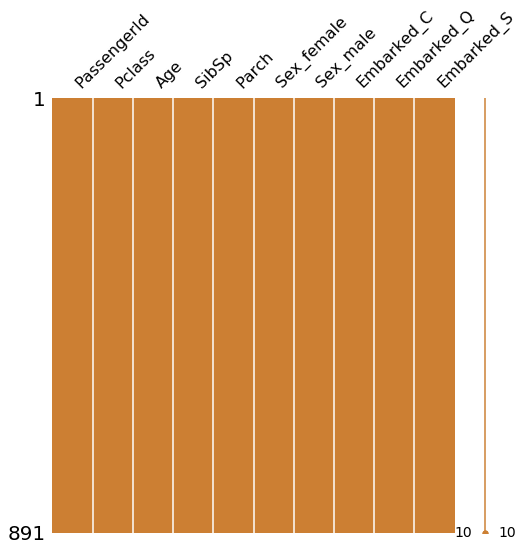

In [40]:
msno.matrix(df=df_train_mice.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

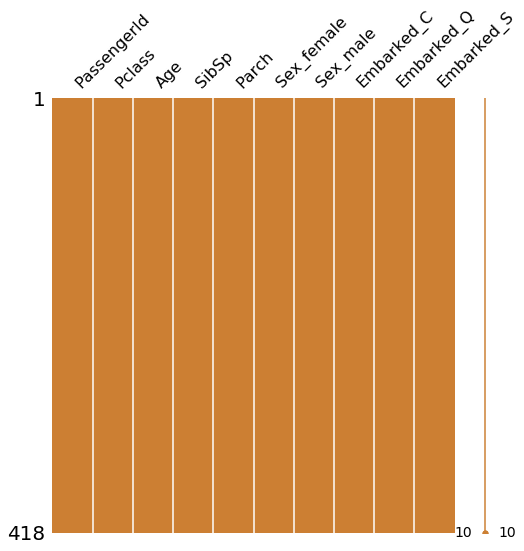

In [41]:
msno.matrix(df=df_test_mice.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

Let's Classify to use various Classifier!

### 1. Support Vector Machine Classifier

In [45]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear')
clf1.fit(df_train_mice, df_train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
test_result_clf1 = clf1.score(df_test_mice, df_test_label)
test_result = clf1.predict(df_test_mice)

test_result_clf1

1.0

In [44]:
# from sklearn.svm import SVC
# clf_ = SVC(kernel='poly')
# clf_.fit(df_train_mice, df_train_label)

In [24]:
# test_result_clf_ = clf_.score(df_test_mice,df_test_label)
# test_result = clf1.predict(df_test_mice)


# test_result_clf_

### 2.Logistic Regression Classifier

In [47]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(penalty='l1')
clf2.fit(df_train_mice, df_train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
test_result = clf2.score(df_test_mice,df_test_label)
test_result

0.9449760765550239

### 3. RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth = 5)
clf3.fit(df_train_mice, df_train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
test_result = clf3.score(df_test_mice,df_test_label)
test_result

0.9066985645933014

### 4. RidgeClassifier

In [51]:
from sklearn.linear_model import RidgeClassifier
clf4 = RidgeClassifier()
clf4.fit(df_train_mice, df_train_label)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

In [52]:
test_result = clf4.score(df_test_mice,df_test_label)
test_result

0.9593301435406698

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

clf5 = GradientBoostingClassifier()
clf5.fit(df_train_mice, df_train_label)

clf5.score(df_test_mice, df_test_label)



0.8157894736842105

In [62]:
from sklearn.neighbors import KNeighborsClassifier

clf6 = KNeighborsClassifier()
clf6.fit(df_train_mice, df_train_label)

clf6.score(df_test_mice, df_test_label)

0.6363636363636364

In [53]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('svm', clf1),('lr',clf2),('Ridge',clf4)])
eclf.fit(df_train_mice, df_train_label)

VotingClassifier(estimators=[('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)), ('lr', LogisticRegression(C=1.0, class_weight=None...True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [55]:
test_result = eclf.score(df_test_mice, df_test_label)
test_result

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9593301435406698

In [60]:
submission = pd.DataFrame()

submission['PassengerId'] = df_test_mice['PassengerId'].astype(np.int64)

submission['Survived'] = test_result

grouped_test = submission[['PassengerId', 'Survived']].groupby('PassengerId').sum().reset_index()
grouped_test.to_csv('submit.csv',index=False)